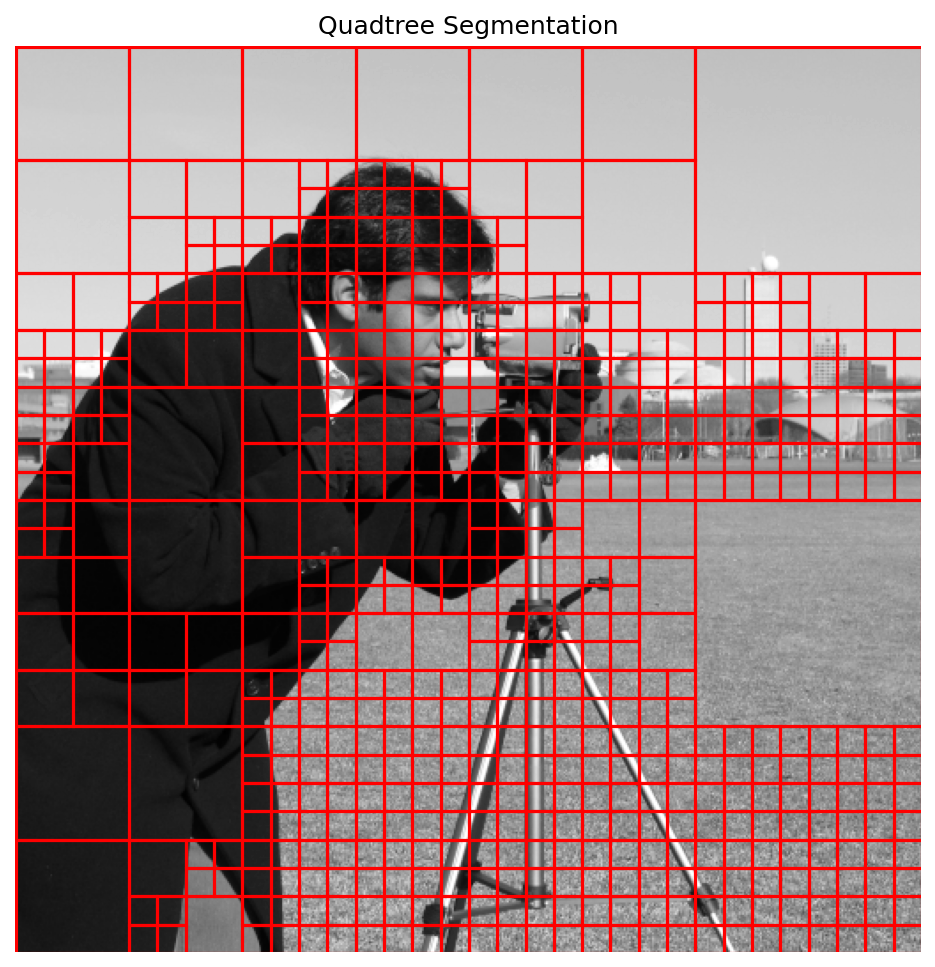

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import data, color

# Ensure plots appear inline in the notebook
%matplotlib inline

def quadtree_partition(image, x, y, width, height, threshold, max_depth, depth=0, segments=None):
    """
    Recursively partitions the image region [y:y+height, x:x+width] into a quadtree
    if the region's standard deviation exceeds 'threshold' and depth < max_depth.
    
    Parameters:
        image (ndarray): 2D (grayscale) or 3D (color) image array.
        x (int): x-coordinate (column index) of the top-left corner of the region.
        y (int): y-coordinate (row index) of the top-left corner of the region.
        width (int): Width of the region.
        height (int): Height of the region.
        threshold (float): Standard deviation threshold for splitting.
        max_depth (int): Maximum recursion depth.
        depth (int): Current recursion depth.
        segments (list): List to store final segments (bounding boxes).
    
    Returns:
        segments (list): List of tuples (x, y, width, height) for each final segment.
    """
    if segments is None:
        segments = []

    # Extract the sub-image
    sub_image = image[y:y+height, x:x+width]
    
    # If the image is color, convert to grayscale for the standard deviation computation
    if sub_image.ndim == 3:
        sub_image_gray = color.rgb2gray(sub_image)
        current_std = np.std(sub_image_gray)
    else:
        current_std = np.std(sub_image)

    # Check if the region should be split
    if current_std > threshold and depth < max_depth and width > 1 and height > 1:
        # Compute half dimensions for splitting
        half_w = width // 2
        half_h = height // 2

        # Recursively split the region into four quadrants
        quadtree_partition(image, x,         y,         half_w, half_h, threshold, max_depth, depth+1, segments)
        quadtree_partition(image, x+half_w,  y,         width-half_w, half_h, threshold, max_depth, depth+1, segments)
        quadtree_partition(image, x,         y+half_h,  half_w, height-half_h, threshold, max_depth, depth+1, segments)
        quadtree_partition(image, x+half_w,  y+half_h,  width-half_w, height-half_h, threshold, max_depth, depth+1, segments)
    else:
        # If the region is homogeneous enough, add it as a final segment
        segments.append((x, y, width, height))

    return segments


def demo_quadtree_segmentation(threshold=10.0, max_depth=5):
    """
    Demonstrates quadtree segmentation on a sample image using the specified threshold and max_depth.
    """
    # Load a sample grayscale image from skimage (you can replace this with your own image)
    image = data.camera()  # Grayscale image

    # Get image dimensions
    h, w = image.shape[:2]

    # Partition the entire image using the quadtree approach
    segments = quadtree_partition(image, x=0, y=0, width=w, height=h,
                                  threshold=threshold, max_depth=max_depth)

    # Display the image with the quadtree segments overlaid
    fig, ax = plt.subplots(figsize=(8, 8), dpi=150)
    ax.imshow(image, cmap='gray')
    
    # Draw bounding boxes for each segment
    for (x, y, width, height) in segments:
        rect = patches.Rectangle((x, y), width, height, linewidth=1.5,
                                 edgecolor='red', facecolor='none')
        ax.add_patch(rect)

    ax.set_title(f'Quadtree Segmentation')
    ax.axis('off')
    plt.show()


# Run the demonstration function
demo_quadtree_segmentation(threshold=10.0, max_depth=5)
